In [89]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=1000,skip_top=3 ) # load dataset and split it between training and testing

word_index = tf.keras.datasets.imdb.get_word_index() # word index = (word : num of appearances)

index2word = dict((i, word) for (word, i) in word_index.items())

x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train]) # create datasets in numpy array format
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])




In [90]:
print(len(word_index))
#print(word_index)
#print(x_train[0])

88584


In [104]:
vacabulary = list()
for text in x_train:
  tokens = text.split()
  vacabulary.extend(tokens)

vocabulary = set(vacabulary)
print(len(vocabulary))


997


In [109]:
dictonary  = dict()
for world in vacabulary :
  dictonary[world] = 0

print(len(dictonary))

997


In [110]:
dictonary  = dict()
for world in vacabulary :
  if world in dictonary:
    dictonary.update({world: dictonary[world] + 1})
  else:
    dictonary[world] = 0

print(len(dictonary))

997


In [94]:
from collections import OrderedDict
#oti prints einai se sxolia einai apla gia na elexoume oti egine sosta i aferesi ton k spanioteron lexeon me xrisi dictonary

sorted_dict = dict(sorted(dictonary.items(), key=lambda item: item[1]),reverse = True)
counter = 0
k = 5
"""for x in sorted_dict:
  print(x,sorted_dict[x])"""

for x in list(sorted_dict):
  print(x,sorted_dict.pop(x,None))
  counter =  counter + 1

  if counter == 5:
    break
"""print()
for x in sorted_dict:
  print(x,sorted_dict[x])"""


cop 600
co 603
portrayed 605
era 605
fighting 606


'print()\nfor x in sorted_dict:\n  print(x,sorted_dict[x])'

In [95]:
neoVocabulary = list()
for x in sorted_dict:
  neoVocabulary.append(x)

"""for x in neoVocabulary:
  print(x)"""

#print(len(neoVocabulary))
print(len(sorted_dict))


993


In [96]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in neoVocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in neoVocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)

100%|██████████| 25000/25000 [00:52<00:00, 473.87it/s]


In [97]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, number_Of_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.number_Of_Features = number_Of_features
        self.root=None

    def fit(self, X, y):
      #x.shape[1] give us the number of feutures we have
        if not self.number_Of_Features:
          self.number_Of_Features = X.shape[1]

        else:
          self.number_Of_Features = min(X.shape[1],self.number_Of_Features)


       
        self.root = self.createTree(X, y)

    def createTree(self, X, y, depth=0):
        n_samples, features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            
            #returns the most common value
            counter = Counter(y)
            #find the most common value if n_labels != 1
            commonValue = counter.most_common(1)[0][0]
      
            return Node(value=commonValue)

        #select features to use
        features_to_used = np.random.choice(features, self.number_Of_Features, replace=False)

        # find the best split
        best_feature, best_thresh = self.find_bestSplit(X, y, features_to_used)

        # create child nodes
        left, right = self.split(X[:, best_feature], best_thresh)
        left = self.createTree(X[left, :], y[left], depth+1)
        right = self.createTree(X[right, :], y[right], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def find_bestSplit(self, x, y,  features):
        best_gain = -1
        splitIndex, split_value = None, None

        for feat in features:
            x_column = x[:, feat]
            value = np.unique(x_column)

            for thr in value:
                # calculate the information gain
                gain = self.information_gain(y, x_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    splitIndex = feat
                    split_value = thr

        return splitIndex, split_value


    def information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self.entropy(y)

        # create children
        left_children, right_children = self.split(X_column, threshold)

        if len(left_children) == 0 or len(right_children) == 0:
            return 0
        
       # n = how many samples we have in the y 
        n = len(y)
        leftSamples = len(left_children)
        rigthSamples = len(right_children)

        leftEntroy = self.entropy(y[left_children])
        rightEntropy =  self.entropy(y[right_children])

        childEntropy = leftEntroy *(leftSamples/n) + rightEntropy *(rigthSamples/n)



        # calculate the IG
        information_gain = parent_entropy - childEntropy
        return information_gain

    def split(self, x_column, split_value):

        leftList = list()
        rightList = list()

        for x in range(len(x_column)):
          if x_column[x]<= split_value:
              leftList.append(x)

          elif  x_column[x]> split_value:
             rightList.append(x)


        left_array =  np.array(leftList)
        right_array =  np.array( rightList)
        return left_array, right_array

        

    def entropy(self, y):
        s = 0
    
        count = np.bincount(y)
        p = count / len(y)
        for p in p:
          if p>0:
            s= s + p*np.log(p)
        return -s

      


    def predict(self, x):
      arr= list()
      for x in x:
        arr.append(self.traverse_tree(x,self.root))
      return np.array(arr)
     

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)
      

In [98]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
clf = DecisionTree(max_depth=10)
clf.fit(x_train_binary, y_train)
predictions = clf.predict(x_test_binary)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)


0.71544


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


print(classification_report(y_test, clf.predict(x_test_binary)))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     12500
           1       0.69      0.79      0.74     12500

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.71     25000
weighted avg       0.72      0.72      0.71     25000



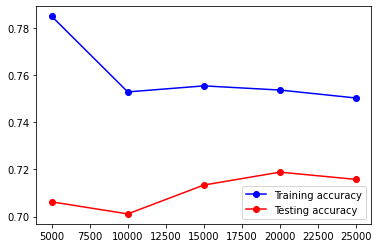

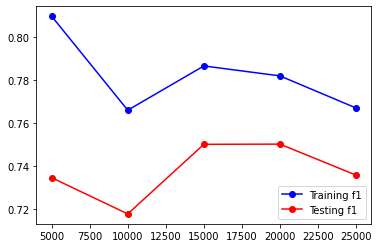

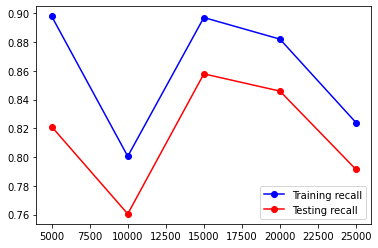

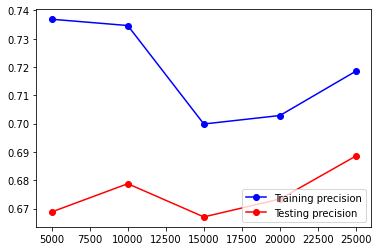

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

def custom_learning_curve(type,x_train, y_train, x_test, y_test,n_splits):
  
  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  curr_y = y_splits[0]
  id3 = DecisionTree(max_depth=  10)
  id3.fit(curr_x, curr_y)

  if (type == 'accuracy'):
    train_accuracies.append(accuracy_score(curr_y,id3.predict(curr_x)))
    test_accuracies.append(accuracy_score(y_test, id3.predict(x_test)))
  elif (type == 'f1'):
    train_accuracies.append(f1_score(curr_y,id3.predict(curr_x)))
    test_accuracies.append(f1_score(y_test, id3.predict(x_test)))
  elif (type == "recall"):
    train_accuracies.append(recall_score(curr_y,id3.predict(curr_x)))
    test_accuracies.append(recall_score(y_test, id3.predict(x_test)))
  else:
    train_accuracies.append(precision_score(curr_y,id3.predict(curr_x)))
    test_accuracies.append(precision_score(y_test, id3.predict(x_test)))
    



  for i in range(1, len(x_splits)):
    id3 = DecisionTree(max_depth=  10)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    id3.fit(curr_x, curr_y)
    if (type == 'accuracy'):
      train_accuracies.append(accuracy_score(curr_y,id3.predict(curr_x)))
      test_accuracies.append(accuracy_score(y_test, id3.predict(x_test)))
    elif (type == 'f1'):
      train_accuracies.append(f1_score(curr_y,id3.predict(curr_x)))
      test_accuracies.append(f1_score(y_test, id3.predict(x_test)))
    elif (type == "recall"):
      train_accuracies.append(recall_score(curr_y,id3.predict(curr_x)))
      test_accuracies.append(recall_score(y_test, id3.predict(x_test)))
    else:
      train_accuracies.append(precision_score(curr_y,id3.predict(curr_x)))
      test_accuracies.append(precision_score(y_test, id3.predict(x_test)))


  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training"+" "+type)

  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing"+" "+type)
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve('accuracy',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('f1',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('recall',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('precision',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

In [78]:
# MEROS B

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DC = DecisionTreeClassifier(criterion='entropy',max_depth=10)
DC.fit(x_train_binary, y_train)

print(classification_report(y_test, DC.predict(x_test_binary)))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     12500
           1       0.69      0.79      0.74     12500

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000



In [86]:
def custom_learning_curve2(type,x_train, y_train, x_test, y_test,n_splits):
      
  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  curr_y = y_splits[0]
  DC = DecisionTreeClassifier(criterion='entropy',max_depth=10)
  DC.fit(curr_x, curr_y)

  if (type == 'accuracy'):
    train_accuracies.append(accuracy_score(curr_y,DC.predict(curr_x)))
    test_accuracies.append(accuracy_score(y_test, DC.predict(x_test)))
  elif (type == 'f1'):
    train_accuracies.append(f1_score(curr_y,DC.predict(curr_x)))
    test_accuracies.append(f1_score(y_test, DC.predict(x_test)))
  elif (type == "recall"):
    train_accuracies.append(recall_score(curr_y,DC.predict(curr_x)))
    test_accuracies.append(recall_score(y_test, DC.predict(x_test)))
  else:
    train_accuracies.append(precision_score(curr_y,DC.predict(curr_x)))
    test_accuracies.append(precision_score(y_test, DC.predict(x_test)))
    



  for i in range(1, len(x_splits)):
    DC = DecisionTreeClassifier(criterion='entropy',max_depth=10)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    DC.fit(curr_x, curr_y)
    if (type == 'accuracy'):
      train_accuracies.append(accuracy_score(curr_y,DC.predict(curr_x)))
      test_accuracies.append(accuracy_score(y_test, DC.predict(x_test)))
    elif (type == 'f1'):
      train_accuracies.append(f1_score(curr_y,DC.predict(curr_x)))
      test_accuracies.append(f1_score(y_test, DC.predict(x_test)))
    elif (type == "recall"):
      train_accuracies.append(recall_score(curr_y,DC.predict(curr_x)))
      test_accuracies.append(recall_score(y_test, DC.predict(x_test)))
    else:
      train_accuracies.append(precision_score(curr_y,DC.predict(curr_x)))
      test_accuracies.append(precision_score(y_test, DC.predict(x_test)))


  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training"+" "+type)

  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing"+" "+type)
  plt.legend(loc="lower right")
  plt.show()

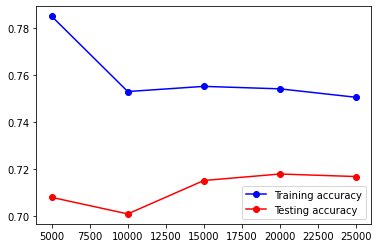

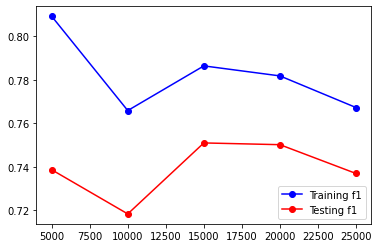

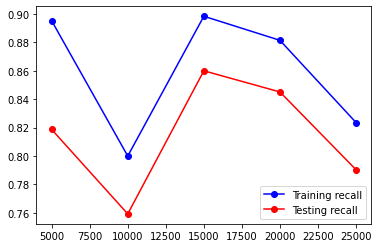

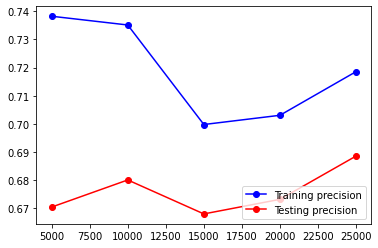

In [87]:
custom_learning_curve2('accuracy',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('f1',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('recall',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('precision',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)